In [1]:
from binance.client import Client
import configparser

config = configparser.ConfigParser()
config.read('config.ini')

api_key = string_val = config.get('Binance', 'api_key')
api_secret = config.get('Binance', 'api_secret')

client = Client(api_key, api_secret)

KeyError: 'api_secret'

In [152]:
symbols = ['BNBBUSD', 'LTCBUSD', 'VETBUSD', 'DOGEBUSD']

ignore_orders = [115266561]

orders = []
for s in symbols:
    orders += client.get_all_orders(symbol=s)
orders

[{'symbol': 'BNBBUSD',
  'orderId': 465754693,
  'orderListId': -1,
  'clientOrderId': 'web_bb8372bea1e84ec7b62ba7fb638a8ca4',
  'price': '0.00000000',
  'origQty': '4.82600000',
  'executedQty': '4.82600000',
  'cummulativeQuoteQty': '2615.65821800',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'BUY',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1618410543131,
  'updateTime': 1618410543131,
  'isWorking': True,
  'origQuoteOrderQty': '2615.76210000'},
 {'symbol': 'BNBBUSD',
  'orderId': 465858505,
  'orderListId': -1,
  'clientOrderId': 'web_1615b2ccf01c4a7b927d15c28f26a090',
  'price': '0.00000000',
  'origQty': '4.82200000',
  'executedQty': '4.82200000',
  'cummulativeQuoteQty': '2631.07222240',
  'status': 'FILLED',
  'timeInForce': 'GTC',
  'type': 'MARKET',
  'side': 'SELL',
  'stopPrice': '0.00000000',
  'icebergQty': '0.00000000',
  'time': 1618411960507,
  'updateTime': 1618411960507,
  'isWorking': True,
  'origQuoteOrde

In [153]:
import pandas as pd
from datetime import datetime

def json_to_df(obj):
    d = {k: [] for k in obj[0]}
    for o in obj:
        for k, v in o.items():
            d[k].append(v)
    return pd.DataFrame.from_dict(d)

def to_readable(epoch, millis=True):
    epoch = epoch / 1000 if millis else epoch
    return datetime.fromtimestamp(epoch).strftime('%Y-%m-%d %H:%M:%S')

def is_ignored(order_id):
    return order_id not in ignore_orders

df_orders = json_to_df(orders)

# remove ignored orders
df_orders = df_orders[df_orders['orderId'].map(is_ignored)]

# add convert history
df_orders = df_orders.append({'symbol': 'BNBBUSD', 'time': 1618172376000, 'status': 'FILLED', 'type': 'MARKET', 
                'side': 'BUY', 'executedQty': '4.44339245', 'cummulativeQuoteQty': '2231.94268572'}, ignore_index=True)
df_orders = df_orders.append({'symbol': 'BNBBUSD', 'time': 1618223911000, 'status': 'FILLED', 'type': 'MARKET', 
                'side': 'SELL', 'executedQty': '4.44339245', 'cummulativeQuoteQty': '2615.94510691'}, ignore_index=True)

df_orders['ds'] = pd.to_datetime(df_orders['time'], unit='ms')
df_orders = df_orders.set_index('ds')
df_orders['assets'] = df_orders['cummulativeQuoteQty'].astype('float')

df_filled_sold = df_orders[(df_orders['status'] == 'FILLED') & (df_orders['assets'] > 0)].sort_index()
df_filled_sold[['symbol', 'executedQty', 'type', 'side', 'assets']]

,symbol,executedQty,type,side,assets
ds,,,,,
2021-04-11 20:19:36.000,BNBBUSD,4.44339245,MARKET,BUY,2231.942686
2021-04-12 10:38:31.000,BNBBUSD,4.44339245,MARKET,SELL,2615.945107
2021-04-14 14:29:03.131,BNBBUSD,4.82600000,MARKET,BUY,2615.658218
2021-04-14 14:52:40.507,BNBBUSD,4.82200000,MARKET,SELL,2631.072222
2021-04-14 16:50:59.424,LTCBUSD,9.67599000,MARKET,BUY,2628.727634
2021-04-14 22:00:35.962,LTCBUSD,9.66641000,LIMIT,SELL,2694.259870
2021-04-14 23:09:12.258,DOGEBUSD,21211.00000000,MARKET,BUY,2691.684913
2021-04-14 23:16:36.010,DOGEBUSD,21189.00000000,MARKET,SELL,2624.427162
2021-04-15 11:14:58.130,VETBUSD,14440.00000000,MARKET,BUY,2621.751854


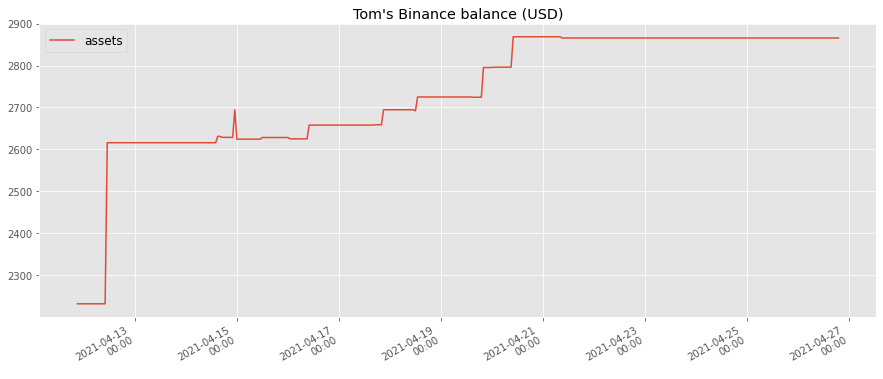

In [154]:
import os

os.chdir('../optimisation') 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
plt.style.use('ggplot')

def plot(typ, df_plot, cols, title=None, baseline=None, fig_file=None):
    plt.rcParams["figure.figsize"] = (15, 6)
    plt.clf()
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d\n%H:%M'))
    for col in cols:
        if typ == 'line':
            plt.plot(df_plot.index, df_plot[col], label=col)
        elif typ == 'bars':
            plt.bar(df_plot.index, df_plot[col], color='#009900', label=col, width=.005)
    if baseline:
        try:
            for bl in baseline:
                plt.axhline(y=bl, color='b', linestyle='-', label='baseline')
        except:
            plt.axhline(y=baseline, color='b', linestyle='-', label='baseline')
    plt.legend(loc="best", prop={'size': 12})
    if not title:
        title = f"{symbol} - freq={freq}"
    plt.title(title)
    plt.gcf().autofmt_xdate()
    if not fig_file:
        fig_file = f"plots/tom-binance.png"
    plt.savefig(fig_file)

def value_from_date(df, date):
    try:
        return df[df.index <= date]['assets'][-1]
    except:
        return None

df_chart = pd.DataFrame(index=pd.date_range(start='2021-04-11', end=datetime.today(), freq='H'))
df_chart['assets'] = [value_from_date(df_filled_sold, d) for d in df_chart.index]

plot('line', df_chart, ['assets'], title=f"Tom's Binance balance (USD)")

In [137]:
from binance import enums as B
import math

FEES = 0.0012

def get_step_size(symbol):
    for f in client.get_symbol_info(symbol)['filters']:
        if f['filterType'] == 'LOT_SIZE':
            return float(f['stepSize'])

def free_balance(asset, fees=True):
    balance = float(client.get_asset_balance(asset=asset)['free'])
    if not fees:
        return balance
    else:
        balance_after_fees = (1 - FEES) * balance
        return balance_after_fees

def buy_all_in(asset, with_asset):
    avail = free_balance(with_asset)
    print(f"Available {with_asset}: {avail}")
    price = float(client.get_symbol_ticker(symbol=f"{asset}{with_asset}")['price'])
    symbol = f"{from_asset}{to_asset}"
    step_size = get_step_size(symbol)
    precision = int(round(- math.log(step_size, 10), 0))
    print(f"{asset} price in {with_asset}: {price}")
    qty = round(avail / price, precision)
    print(f"{asset} to buy: {qty}")
    order = client.order_market_buy(
        symbol=symbol,
        quantity=qty
    )
    return order

from_asset, to_asset = 'VET', 'BUSD'

buy_all_in(from_asset, to_asset)


Available BUSD: 10.517513690156001
VET price in BUSD: 0.18671
VET to buy: 56.3


{'symbol': 'VETBUSD',
 'orderId': 115266561,
 'orderListId': -1,
 'clientOrderId': 'YeEvYqVby6I2xquvMUIPJl',
 'transactTime': 1619453520539,
 'price': '0.00000000',
 'origQty': '56.30000000',
 'executedQty': '56.30000000',
 'cummulativeQuoteQty': '10.51346200',
 'status': 'FILLED',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'side': 'BUY',
 'fills': [{'price': '0.18674000',
   'qty': '56.30000000',
   'commission': '0.00001469',
   'commissionAsset': 'BNB',
   'tradeId': 5496844}]}